## Observations and Insights 

# With a correlation of 0.88; there is a strong positive correlation between the weight of mice and the average tumor volume. Of all the drugs tested Capomulin and Ramicane had the most consistant amount of data throughout the study. Capomulin and Ramicane also have the lowest final tumor growth by the end of the study, with this data we could say that these two drugs are the most efficient at reducing trumor groth.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#Rename columns for easier working
renamed_df = merge_df.rename(columns={"Mouse ID": "mouse_id",
                                     "Drug Regimen": "drug_regimen",
                                      "Sex": "sex",
                                      "Age_months": "age_months",
                                      "Weight (g)": "weight (g)",
                                      "Timepoint": "timepoint",
                                     "Tumor Volume (mm3)": "tumor_volume",
                                     "Metastatic Sites": "metastatic_sites"})
# Display the data table for preview
renamed_df

,mouse_id,drug_regimen,sex,age_months,weight (g),timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
renamed_df["mouse_id"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#reference for finding code: https://bit.ly/39jjxVA
dup_data = renamed_df[renamed_df.duplicated(subset=["mouse_id", "timepoint"], keep=False)]
print(dup_data)

    mouse_id drug_regimen     sex  age_months  weight (g)  timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     tumor_volume  metastatic_sites  
908     45.000000                 0  
909     45.000000                 0  
910     48.786801                 0  
911     47.570392                 0  
912     51.745156

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_data

,mouse_id,drug_regimen,sex,age_months,weight (g),timepoint,tumor_volume,metastatic_sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. Referenced code from: https://bit.ly/2CABl2y
idindex = renamed_df[renamed_df['mouse_id'] == 'g989'].index
#drop the mouse_id data
renamed_df.drop(idindex, inplace=True)
renamed_df

,mouse_id,drug_regimen,sex,age_months,weight (g),timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
renamed_df["mouse_id"].nunique()

248

## Summary Statistics

In [7]:
#Get the name of each regimen
each_drug = renamed_df["drug_regimen"].unique()
print(each_drug)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Mean
mean = renamed_df.groupby("drug_regimen")["tumor_volume"].mean()
mean_df = pd.DataFrame(data = mean)
mean_df = mean_df.rename(columns={"tumor_volume": "Mean Tumor Volume"})
#Median
median = renamed_df.groupby("drug_regimen")["tumor_volume"].median()
median_df = pd.DataFrame(data = median)
median_df = median_df.rename(columns={"tumor_volume": "Median Tumor Volume"})
#Variance
variance = renamed_df.groupby("drug_regimen")["tumor_volume"].var(ddof = 0)
variance_df = pd.DataFrame(data = variance)
variance_df = variance_df.rename(columns={"tumor_volume": "Variance Tumor Volume"})
#Standard Deviation
st_dev = renamed_df.groupby("drug_regimen")["tumor_volume"].std(ddof = 0)
st_dev_df = pd.DataFrame(data= st_dev)
st_dev_df = st_dev_df.rename(columns={"tumor_volume": "St. Dev. Tumor Volume"})
#Standard Error of the Mean
sem = renamed_df.groupby("drug_regimen")["tumor_volume"].sem(ddof = 0)
sem_df = pd.DataFrame(sem)
sem_df = sem_df.rename(columns={"tumor_volume": "SEM Tumor Volume"})

# This method is the most straighforward, creating multiple series and putting them all together at the end.
combined_stats_list = [mean_df, median_df, variance_df, st_dev_df, sem_df]
merge1 = pd.merge(mean_df , median_df, on = "drug_regimen", how='outer')
merge2 = pd.merge(merge1 , variance_df, on = "drug_regimen", how='outer')
merge3 = pd.merge(merge2 , st_dev_df, on = "drug_regimen", how='outer')
summ_stats = pd.merge(merge3 , sem_df, on = "drug_regimen", how='outer')
summ_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,St. Dev. Tumor Volume,SEM Tumor Volume
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_fun = renamed_df.groupby('drug_regimen').tumor_volume.agg(['mean', 'median', 'var', 'std', 'sem'])

#Rename columns for readability
renamed_cols = agg_fun.rename(columns={"mean": "Mean Tumor Volume",
                                      "median": "Median Tumor Volume",
                                      "var": "Variance Tumor Volume",
                                      "std": "St. Dev. Tumor Volume",
                                      "sem": "SEM Tumor Volume"})
renamed_cols

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,St. Dev. Tumor Volume,SEM Tumor Volume
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

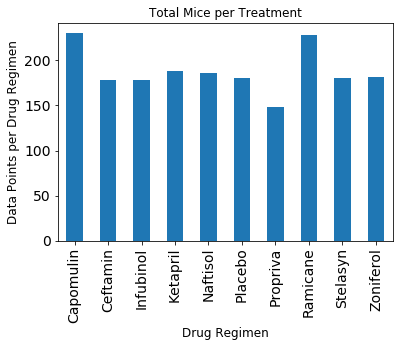

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count = renamed_df.groupby('drug_regimen').count()["mouse_id"]
bar = count.plot.bar(y="timepoint", title="Total Mice per Treatment", fontsize=14, legend=False)
bar.set_xlabel("Drug Regimen", fontsize=12)
bar.set_ylabel("Data Points per Drug Regimen", fontsize=12)
plt.show()

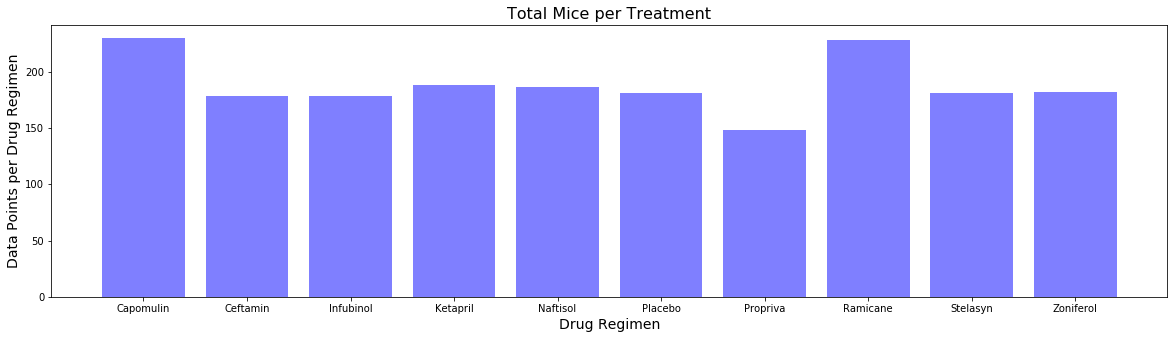

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
count = renamed_df.groupby('drug_regimen').count()
x_axis = np.arange(len(count))
tick_locations = [value for value in x_axis]
drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.figure(figsize=(20,5))
plt.bar(x_axis, count["timepoint"], color="b", alpha=0.5, align="center")
plt.xticks(tick_locations, drugs)
plt.title("Total Mice per Treatment", fontsize=16)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Data Points per Drug Regimen", fontsize=14)
plt.show()

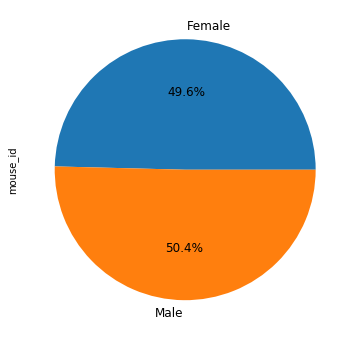

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Get count of females and males 
sex = renamed_df.groupby(renamed_df["sex"])
gender = sex["mouse_id"].nunique()
plt.ylabel("")
plt.xlabel("")
plot = gender.plot.pie(y='sex', figsize=(6,6), autopct="%1.1f%%", fontsize=12)


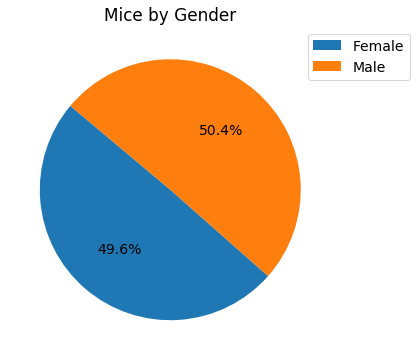

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Get count of females and males 
sex = renamed_df.groupby(renamed_df["sex"])
sex["mouse_id"].nunique()
labels = ["Female", "Male"]
plt.rcParams['font.size'] = 14
plt.figure(figsize=[6,6])

pie_data = pd.DataFrame(sex["mouse_id"].nunique())
pie_data.reset_index()

plt.pie(pie_data["mouse_id"], autopct="%1.1f%%", startangle=140)

#Formatting
plt.title("Mice by Gender")
plt.legend(labels, bbox_to_anchor=(.9,1))
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greastest_timepoint = pd.DataFrame({"timepoint": renamed_df.groupby(["mouse_id"])["timepoint"].max()}).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_timepoint = greastest_timepoint.merge(renamed_df, on=["mouse_id","timepoint"], how="inner")
merge_timepoint

,mouse_id,timepoint,drug_regimen,sex,age_months,weight (g),tumor_volume,metastatic_sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
#Rows that contain Capomulin
captumor = merge_timepoint.loc[merge_timepoint["drug_regimen"] == "Capomulin", :]
captumors = captumor["tumor_volume"]

#Calculate quartiles, IQR, and potential outliers
quartiles = captumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"the lower quartile of Capomulin is: {lowerq}")
print(f"the upper quartile of Capomulin is: {upperq}")
print(f"the interquartile range of Capomulin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

the lower quartile of Capomulin is: 32.37735684
the upper quartile of Capomulin is: 40.1592203
the interquartile range of Capomulin is: 7.781863460000004
Capomulin potential outliers could be values below 20.70456164999999 and above 28.486425109999995 could be outliers.


In [16]:
#Rows that contain Ramicane
ramtumor = merge_timepoint.loc[merge_timepoint["drug_regimen"] == "Ramicane", :]
ramtumors = ramtumor["tumor_volume"]

#Calculate quartiles, IQR, and potential outliers
quartiles = ramtumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"the lower quartile of Ramicane is: {lowerq}")
print(f"the upper quartile of Ramicane is: {upperq}")
print(f"the interquartile range of Ramicane is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)
print(f"Ramicane potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

the lower quartile of Ramicane is: 31.56046955
the upper quartile of Ramicane is: 40.65900627
the interquartile range of Ramicane is: 9.098536719999998
Ramicane potential outliers could be values below 17.912664470000003 and above 27.01120119 could be outliers.


In [17]:
#Rows that contain Infubinol
inftumor = merge_timepoint.loc[merge_timepoint["drug_regimen"] == "Infubinol", :]
inftumors = inftumor["tumor_volume"]

#Calculate quartiles, IQR, and potential outliers
quartiles = inftumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"the lower quartile of Infubinol is: {lowerq}")
print(f"the upper quartile of Infubinol is: {upperq}")
print(f"the interquartile range of Infubinol is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)
print(f"Infubinol potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

the lower quartile of Infubinol is: 54.04860769
the upper quartile of Infubinol is: 65.52574285
the interquartile range of Infubinol is: 11.477135160000003
Infubinol potential outliers could be values below 36.83290494999999 and above 48.310040109999996 could be outliers.


In [18]:
#Rows that contain Ceftamin
ceftumor = merge_timepoint.loc[merge_timepoint["drug_regimen"] == "Ceftamin", :]
ceftumors = ceftumor["tumor_volume"]

#Calculate quartiles, IQR, and potential outliers
quartiles = ceftumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"the lower quartile of Ceftamin is: {lowerq}")
print(f"the upper quartile of Ceftamin is: {upperq}")
print(f"the interquartile range of Ceftamin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)
print(f"Ceftamin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

the lower quartile of Ceftamin is: 48.72207785
the upper quartile of Ceftamin is: 64.29983003
the interquartile range of Ceftamin is: 15.577752179999997
Ceftamin potential outliers could be values below 25.355449580000002 and above 40.93320176 could be outliers.


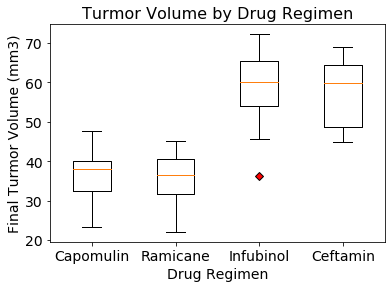

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plotting_data=[captumors, ramtumors, inftumors, ceftumors]

fig1, ax1 = plt.subplots()
ax1.set_title("Turmor Volume by Drug Regimen", fontsize=16)
ax1.set_ylabel("Final Turmor Volume (mm3)", fontsize=14)
ax1.set_xlabel("Drug Regimen", fontsize=14)

red_diamond = dict(markerfacecolor='r', marker='D')
ax1.boxplot(plotting_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=red_diamond)
plt.show()

## Line and Scatter Plots

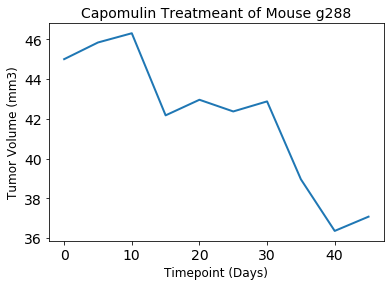

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line = renamed_df.loc[renamed_df["mouse_id"] == "g288", :]

x_axis = line["timepoint"]
tumor_size = line["tumor_volume"]

plt.title('Capomulin Treatmeant of Mouse g288', fontsize=14)
plt.plot(x_axis, tumor_size, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)
plt.show()

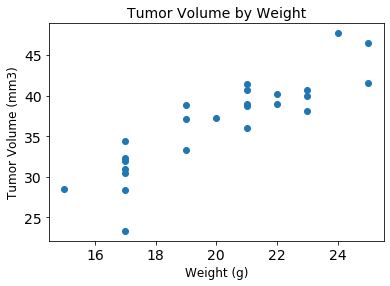

In [21]:
# Generate a scatter plot of mouse weight versus average(mean) tumor volume for the Capomulin regimen
capomulin_avg = captumor.groupby(["mouse_id"]).mean()
weight = capomulin_avg["weight (g)"]
tmvol = capomulin_avg["tumor_volume"]
plt.scatter(weight, tmvol)
plt.title("Tumor Volume by Weight", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.show()

## Correlation and Regression

The correlation between mice weight and tumor volume is 0.88


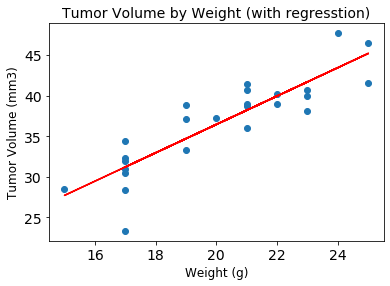

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,tmvol)
print(f"The correlation between mice weight and tumor volume is {round(correlation[0],2)}")
regress = st.linregress(weight, tmvol)
#Slope & Intercept
slope = 1.750468228958504
inter = 1.4481469525549002

#make regression line
reg_line = weight*slope + inter
#Get scatterplot to put regression line on
plt.scatter(weight, tmvol)
plt.plot(weight,reg_line, color="red")
plt.title("Tumor Volume by Weight (with regresstion)", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

plt.show()